### MovieLens Case Study

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- **ratings.csv:** It contains information on ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- **movie.csv:** The file contains information related to the movies and their genre. Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- **user.csv:** It contains information about the users who have rated the movies.. Columns: user id, age, gender, occupation, zip code

### Objective:

`To extract insights from the dataset`

### Learning Outcomes:
`Use of Pandas Functions - shape, describe, groupby, merge etc.`


#### Domain 
`Internet and Entertainment`

**Note that the case study will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

### 2. Read all the three datasets

In [2]:
# Reading datasets by using read_csv from pandas package
ratings = pd.read_csv("ratings.csv")
movie = pd.read_csv("movie.csv")
user = pd.read_csv("user.csv")

### 3. View the first 5 rows of all the datasets.
`Note that you will need to do it for all three datasets separately`

In [3]:
ratings.head(5)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie.head(5)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 4. Understand the shape of all the datasets.
`Note that you will need to do it for all the three datasets seperately`

In [6]:
# ratings
ratings.shape

(100000, 4)

 **Observation:** There are 100000 rows and 4 columns in the ratings dataset

In [7]:
# user
user.shape

(943, 5)

 **Observation:** There are 943 rows and 5 columns in the user dataset

In [8]:
# movie
movie.shape

(1680, 21)

 **Observation:** There are 1680 rows and 21 columns in the movie dataset

### 5. Check the data types of the columns for all the datasets.
 `Note that you will need to do it for all three datasets separately`

In [9]:
# ratings
# We use dataframe.dtypes to get the data types of each column
ratings.dtypes 

user id      int64
movie id     int64
rating       int64
timestamp    int64
dtype: object

 **Observation:** All columns have integer data type 

In [10]:
# user
user.dtypes

user id        int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

 **Observations:**
 1. user id and age columns are of integer data types 
 2. gender, occupation and zip code columns are of string data type

In [11]:
# movie
movie.dtypes

movie id         int64
movie title     object
release date    object
Action           int64
Adventure        int64
Animation        int64
Childrens        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

**Observation:**
1. movie title and release date are of string data type
2. movie id and all genres are of interger data type

### 6. Give a statistical summary for all the datasets.
`Note that you will need to do it for all three datasets separately`

In [12]:
# ratings
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


**Observation:** The mean and Median of user ratings are 3.53 & 4.00 respectively

In [13]:
# user
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


**Observation:** The average age of all the users is 34 years while the range lies between 7 to 73 years.

In [14]:
# movie
movie.describe()

,movie id,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,841.525595,0.149405,0.080357,0.025000,0.072619,0.300595,0.064881,0.029762,0.431548,0.013095,0.014286,0.054762,0.033333,0.036310,0.147024,0.060119,0.149405,0.042262,0.016071
std,485.609591,0.356593,0.271926,0.156171,0.259587,0.458653,0.246389,0.169980,0.495440,0.113717,0.118701,0.227583,0.179559,0.187115,0.354235,0.237778,0.356593,0.201246,0.125788
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation:** The genres should be in categorical format and not in the numeric because it is of binary class

### The statistical summary of the data will give us an overview of the data by providing key statistics of the different columns in the data.

### 7. Find the number of movies per genre using the movie data

In [15]:
# Getting all the column names
movie.columns 

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [16]:
# Taking all the genre columns and finding the sum for every column
movie[[ 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum() 

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [17]:
# Alternatively, we can also loc function
movie.loc[:,'Action':'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [18]:
# Sorting the movies across genres
number = movie.loc[:,'Action':'Western'].sum()
number.sort_values(ascending = False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

**Observations:**
1. Drama and Comedy are the most common movie genre.
2. Clearly, there are some movies that have more than one genre.

### Applying functions on specific columns of the data will help us in gaining specific insights about the data.

### 8. Find the movies that have more than one genre
`Hint: use sum on the axis = 1`

In [19]:
# Checking column names
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [20]:
# we create a new dataframe using two columns of the movie dataframe
new_movie = movie[['movie id', 'movie title']].copy()

In [21]:
new_movie["Number of Genres"] = movie.loc[:, 'Action':'Western'].sum(axis=1)

In [22]:
# Filtering movies that have more than 1 genres
new_movie[new_movie['Number of Genres']>1]

,movie id,movie title,Number of Genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1666,1669,MURDER and murder,3
1667,1670,Tainted,2
1670,1673,Mirage,2
1676,1679,B. Monkey,2


**Observation:** 849 movies have more than one genre.

### Creating new columns using existing columns in the dataframe requires domain knowledge, and can help us to understand our data better.

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html.

In [23]:
# Merging ratings dataset with movie dataset
df_merge = movie.merge(ratings, on = 'movie id', how = 'inner')
df_merge.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,66,3,883601324


In [24]:
# Checking the dimensions of the merged dataframe
df_merge.shape

(99990, 24)

In [25]:
# Finding the count of ratings for each movie using groupby() and count()
# reset_index() is used to shift movie title from being the dataframe’s (movie_count’s) index to 
# being just a normal column 
movie_count = df_merge.groupby(['movie title'])['rating'].count().reset_index()
movie_count.head()

,movie title,rating
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41


In [26]:
# Extracting the movie titles that have more than 100 ratings 
movie_100 = movie_count[movie_count['rating']>100]['movie title']
movie_100.head()

2            101 Dalmatians 
3              12 Angry Men 
7     2001: A Space Odyssey 
15           Absolute Power 
16               Abyss, The 
Name: movie title, dtype: object

In [27]:
# Finding average ratings for each movie and sorting them out in descending order
# using groupby() and sort_values() on merged data frame
avg_rating = df_merge.groupby(['movie title'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating

,movie title,rating
0,"Great Day in Harlem, A",5.0
1,Prefontaine,5.0
2,Someone Else's America,5.0
3,Entertaining Angels: The Dorothy Day Story,5.0
4,Marlene Dietrich: Shadow and Light (,5.0
...,...,...
1652,Babyfever,1.0
1653,Lashou shentan,1.0
1654,Shadows (Cienie),1.0
1655,Shadow of Angels (Schatten der Engel),1.0


In [28]:
# Extracting movie titles that have more than 100 ratings using movie titles in movie_100 and isin() function
# Displaying top 25 rows only
avg_rating[avg_rating['movie title'].isin(movie_100)].head(25)

,movie title,rating
15,"Close Shave, A",4.491071
16,Schindler's List,4.466443
17,"Wrong Trousers, The",4.466102
18,Casablanca,4.456790
20,"Shawshank Redemption, The",4.445230
21,Rear Window,4.387560
22,"Usual Suspects, The",4.385768
23,Star Wars,4.358491
24,12 Angry Men,4.344000
28,Citizen Kane,4.292929


### We have just learned how to use groupby() to  group the various categories in the data, and how to use sort_values() to sort the data.

### 10. Find the relationship between user demographics and movie ratings

#### 10.1 Find the mean rating for every occupation 

1. Merge the user dataset with movie and ratings(already merged : df_merge) dataset
2. Apply groupby on occupation

In [29]:
# Merging user dataset with movie and ratings(already merged : df_merge) dataset
df_merge_all = df_merge.merge(user, on = 'user id', how = 'inner')

In [30]:
# Group by occupation and aggregate with mean
df_merge_all.groupby('occupation').rating.mean()

occupation
administrator    3.635646
artist           3.653380
doctor           3.688889
educator         3.670692
engineer         3.541473
entertainment    3.440783
executive        3.349794
healthcare       2.896220
homemaker        3.301003
lawyer           3.735316
librarian        3.560781
marketing        3.485641
none             3.777778
other            3.552335
programmer       3.568205
retired          3.466750
salesman         3.582944
scientist        3.611273
student          3.515167
technician       3.532097
writer           3.376152
Name: rating, dtype: float64

**Observation:**: The mean rating is low (2.89) for people working in healthcare.

#### 10.2 Find mean rating for each gender

In [31]:
df_merge_all.groupby('gender').rating.mean()

gender
F    3.531510
M    3.529333
Name: rating, dtype: float64

**Observation**: The ratings given by men and women are similar on average.

#### 10.3 Find the mean rating grouped by both occupation and gender
1. Put both the columns under groupby function and find the mean rating. 

In [32]:
df_merge_all.groupby(['occupation','gender']).rating.mean()

occupation     gender
administrator  F         3.781839
               M         3.555233
artist         F         3.347065
               M         3.875841
doctor         M         3.688889
educator       F         3.699132
               M         3.660246
engineer       F         3.751724
               M         3.537676
entertainment  F         3.448889
               M         3.439807
executive      F         3.773756
               M         3.320340
healthcare     F         2.736021
               M         3.639839
homemaker      F         3.278810
               M         3.500000
lawyer         F         3.623188
               M         3.741379
librarian      F         3.580070
               M         3.537920
marketing      F         3.522624
               M         3.474801
none           F         3.632877
               M         3.876636
other          F         3.531114
               M         3.563447
programmer     F         3.577566
               M         3

**Observations:** 

1. We had seen that the healthcare sector had a low mean rating. We now see that the low rating is driven by the female workers in the healthcare sector.

2. The male writers have given lower ratings compared to the female writers.

3. Only male doctors have given ratings. No female doctors have given ratings as per the data.

### Using groupby() on multiple columns of the data helps us analyze subsets of the data to gain insights.

### 11. Find the mean rating for each genre.

In [33]:
cols=df_merge_all.loc[:,'Action':'Western'].columns

for i in cols:
    print(i,':' , df_merge_all[df_merge_all[i]==1].rating.mean())

Action : 3.480245417953027
Adventure : 3.503526503308369
Animation : 3.5766990291262135
Childrens : 3.3532442216652742
Comedy : 3.3940734781442745
Crime : 3.6322780881440098
Documentary : 3.6728232189973613
Drama : 3.6873793708484772
Fantasy : 3.2152366863905324
Film-Noir : 3.9215233698788228
Horror : 3.2903893172841827
Musical : 3.521396851029471
Mystery : 3.63813155386082
Romance : 3.621704948358255
Sci-Fi : 3.5607227022780834
Thriller : 3.5090069495245064
War : 3.815811874866993
Western : 3.6132686084142396


**Observation**: War movies have the highest average rating, while Fantasy movies have the lowest average rating.

### 12. Divide the age column into four groups.

* Group 1. 0-20 => Teenager
* Group 2. 20-40 => Adult
* Group 3. 40-55 => Middle Age
* Group 4. 55+ => Elderly

This questions requires pandas cut() function.

Refer this link for more info: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [34]:
#create a new column with name age_group
df_merge_all['age_group']=pd.cut(df_merge_all.age, bins=(0,20,40,55,100),labels=('Teenager','Adult','Middle Age','Elderly'))

In [35]:
#print top 5 entries of the age and age_group columns
df_merge_all[['age','age_group']].head()

,age,age_group
0,60,Elderly
1,60,Elderly
2,60,Elderly
3,60,Elderly
4,60,Elderly


In [36]:
#print last 5 entries of the age and age_group columns
df_merge_all[['age','age_group']].tail()

,age,age_group
99985,19,Teenager
99986,19,Teenager
99987,19,Teenager
99988,19,Teenager
99989,19,Teenager


#### 12.1 Find the mean rating for each age group.

In [36]:
df_merge_all.groupby(['age_group']).rating.mean()

age_group
Teenager      3.548290
Adult         3.492513
Middle Age    3.606980
Elderly       3.651703
Name: rating, dtype: float64

**Observation:** Old people have given higher ratings than any other age group.

#### 12.2 Find the mean, median, and standard deviation of rating for each age group.

1. This can be done using groupby.agg(), where agg() stands for aggregate.
2. agg() can take more than 1 aggregate function simultaneously.

Refer to this link for more info :https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

In [37]:
df_merge_all.groupby(['age_group']).rating.agg(['mean','median','std'])

,mean,median,std
age_group,,,
Teenager,3.548290,4,1.154198
Adult,3.492513,4,1.138085
Middle Age,3.606980,4,1.083602
Elderly,3.651703,4,1.030762


#### 12.3 Which genre movies are common among Engineers?

In [38]:
df_merge_all.groupby('occupation').sum().loc[:,'Action':'Western'].loc['engineer']

Action         2277
Adventure      1299
Animation       363
Childrens       629
Comedy         2438
Crime           611
Documentary      51
Drama          3153
Fantasy         125
Film-Noir       145
Horror          414
Musical         441
Mystery         363
Romance        1467
Sci-Fi         1221
Thriller       1712
War             858
Western         180
Name: engineer, dtype: int64

<AxesSubplot:>

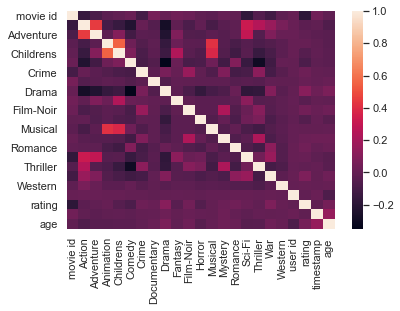

In [42]:
sns.heatmap(df_merge_all[['age','rating',]].corr(), annot=False)

**Observation:**   Engineers mostly watch movies of Drama, Comedy, and Action genres.

You can try finding the most common genre among different professionals.

### We have just learned how to use the pandas cut() function to group a numerical column in the data into different categories and use agg() to use multiple aggregate functions at once with groupby(). These are important techniques that allow us to create informative groups from numerical columns and understand multiple statistics of subsets of our data at once.